In [1]:
import backtrader as bt
import os
import sys
import datetime

In [12]:
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )
    
    def log(self, txt, dt=None, doprint=False):
        
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("{} {}".format(dt.isoformat(), txt))
        
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.maperiod)
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log("BUY EXECUTED, Price: {} Cost: {} Comission: {}".format(order.executed.price, order.executed.value, order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log("SELL EXECUTED, Price: {} Cost: {} Comission: {}".format(order.executed.price, order.executed.value, order.executed.comm))
            
            self.bar_executed = len(self)
        
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")
        
        
        self.order=None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log('OPERATION PROFIT, GROSS: {}, NET: {}'.format(trade.pnl, trade.pnlcomm))
    
    def next(self):
        self.log('Close {}'.format(self.dataclose[0]))
        
        if self.order:
            return
        
        if not self.position:
            if (self.dataclose[0] < self.sma[0]):
                    self.log("BUY CREATE {}".format(self.dataclose[0]))
                    self.order = self.buy()
        else:
            if self.dataclose[0] < self.sma[0]:
                self.log("SELL CREATED {}".format(self.dataclose[0]))
                self.order = self.sell()
                
    def stop(self):
        self.log("(MA Period: {} Ending Value: {})".format(self.params.maperiod, self.broker.getvalue()), doprint=True)

In [13]:
cerebro = bt.Cerebro()
starts = cerebro.optstrategy(TestStrategy, maperiod=range(10,31))
cerebro.addstrategy(TestStrategy)

1

In [14]:
path=os.path.join(os.getcwd(), 'orcl-1995-2014.txt')
print(path)

/home/warproxxx/Desktop/Projects/backtrader practise/orcl-1995-2014.txt


In [15]:
data = bt.feeds.YahooFinanceCSVData(
dataname=path,
# Do not pass values before this date
fromdate=datetime.datetime(2000, 1, 1),
# Do not pass values before this date
todate=datetime.datetime(2000, 12, 31),
# Do not pass values after this date
reverse=False)

In [16]:
cerebro.adddata(data)

In [17]:
cerebro.broker.setcash(100000)
cerebro.addsizer(bt.sizers.FixedSize, stake=10)
cerebro.broker.setcommission(commission=0.001)

In [18]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
a =cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-12-29 (MA Period: 10 Ending Value: 111543.27280000006)
2000-12-29 (MA Period: 11 Ending Value: 111408.52710000006)
2000-12-29 (MA Period: 15 Ending Value: 111408.52710000006)
2000-12-29 (MA Period: 15 Ending Value: 111543.27280000006)
2000-12-29 (MA Period: 15 Ending Value: 111326.30030000009)
2000-12-29 (MA Period: 12 Ending Value: 111516.23750000008)
2000-12-29 (MA Period: 13 Ending Value: 111326.30030000009)
2000-12-29 (MA Period: 15 Ending Value: 111516.23750000008)
2000-12-29 (MA Period: 14 Ending Value: 111493.08260000011)
2000-12-29 (MA Period: 15 Ending Value: 111493.08260000011)
2000-12-29 (MA Period: 15 Ending Value: 99914.48759999986)
2000-12-29 (MA Period: 15 Ending Value: 99914.48759999986)
2000-12-29 (MA Period: 16 Ending Value: 111214.23630000014)
2000-12-29 (MA Period: 17 Ending Value: 111029.92080000014)
2000-12-29 (MA Period: 15 Ending Value: 111029.92080000014)
2000-12-29 (MA Period: 15 Ending Value: 111214.23630000014)
2000-1

/home/warproxxx/.local/lib/python3.5/site-packages/backtrader/plot/plot.py:127: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packag

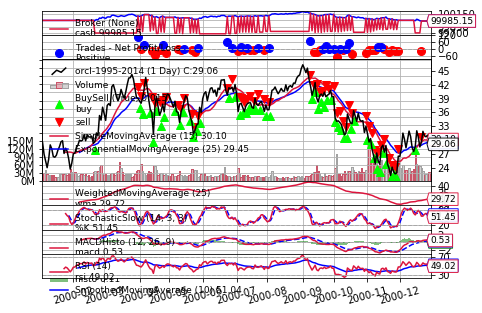

[[<Figure size 432x288 with 8 Axes>]]

In [229]:
cerebro.plot()